Change learner to attempt to overfit AdaBoost.

In [17]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Pipeline
from tree import TreeModel

# ===== import data; tr,ts ======
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

In [19]:
# ===== AdaBoost =====
start = time.time()

ab_params = {
    'X_tr': X_tr.to_numpy(),
    'X_ts': X_ts.to_numpy(),
    'y_tr': y_tr.values.ravel(),
    'y_ts': y_ts.values.ravel(),
    'model': AdaBoostClassifier(estimator=DecisionTreeClassifier(), algorithm='SAMME'), # Avoid warning messages instead of SAMME.R - default
    'name': 'AdaBoost'
}

ab_pipeline = TreeModel(**ab_params)

ab_fit_params = {
    'param_grid': {
        'n_estimators': [50, 100, 500, 1000],
        'learning_rate': [0.1, 0.5, 1.0, 2.0],
        'estimator__max_depth': [1, 3, 5],
    },
    'balance_classes': False,
    'k_folds': 2,
    'scoring': 'accuracy'
}

ab_pipeline.fit_predict(**ab_fit_params)

end = time.time()
elapsed = end - start
print(f"Elapsed time: {elapsed:.2f} seconds")

Elapsed time: 487.49 seconds


In [21]:
print("Best Hyperparameters:", ab_pipeline.grid.best_params_)
ab_pipeline.tr_ts_scoring

Best Hyperparameters: {'estimator__max_depth': 5, 'learning_rate': 0.5, 'n_estimators': 1000}
AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier())
Grid - Hyperparameters: ['n_estimators', 'learning_rate', 'estimator__max_depth']
Train Accuracy: 87.202%
CV Validation Accuracy: 86.413%
Test Accuracy: 86.786%


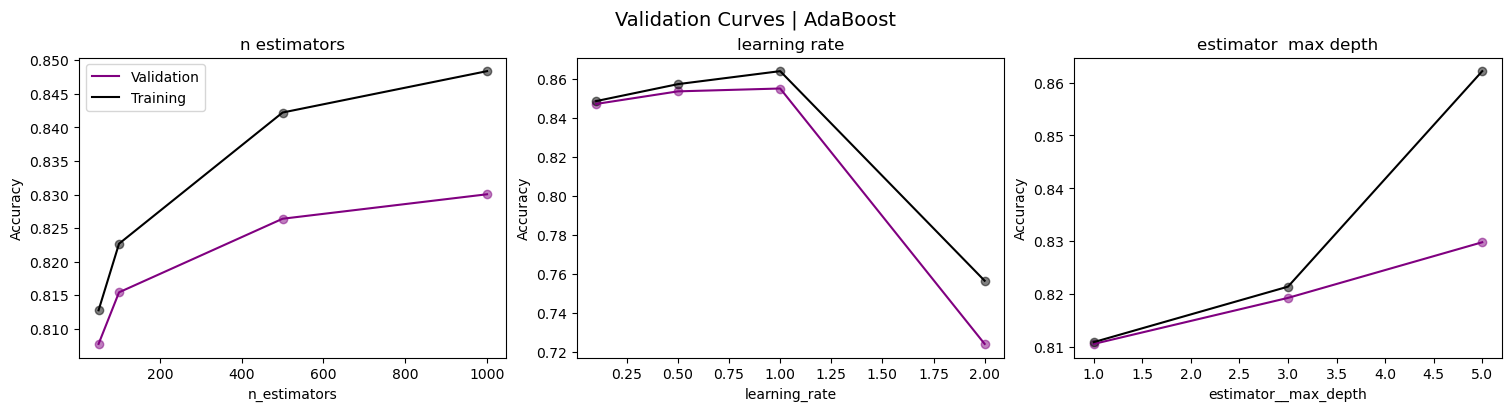

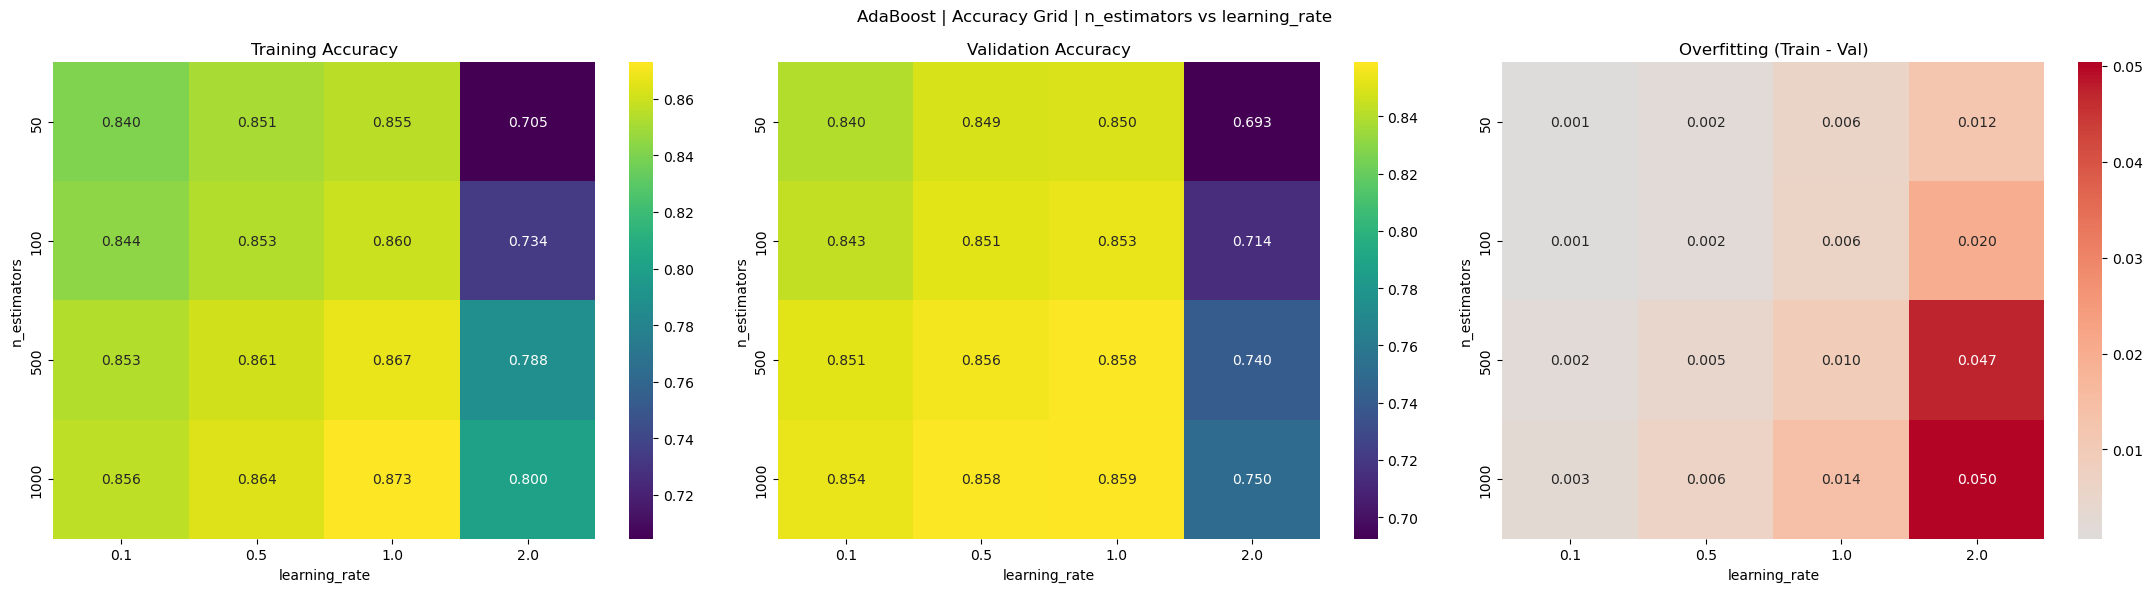

In [24]:
# ===== AdaBoost Scoring & Visualization ======
os.makedirs('media/04_adaboost', exist_ok=True)

plot_vhgr_params = {
    'param_list': ab_pipeline.hyper_grid,
    'figsize': (5, 4),
    'save_path': 'media/04_adaboost/balanced_validation_curvesV2.png'
}
ab_pipeline.plot_validation_hyperparam_grid_row(**plot_vhgr_params)

ab_pipeline.viz_heatmap_cv(
    top_two_params_for_overfitting=['n_estimators', 'learning_rate'],
    dir_save_path='media/04_adaboost'
)

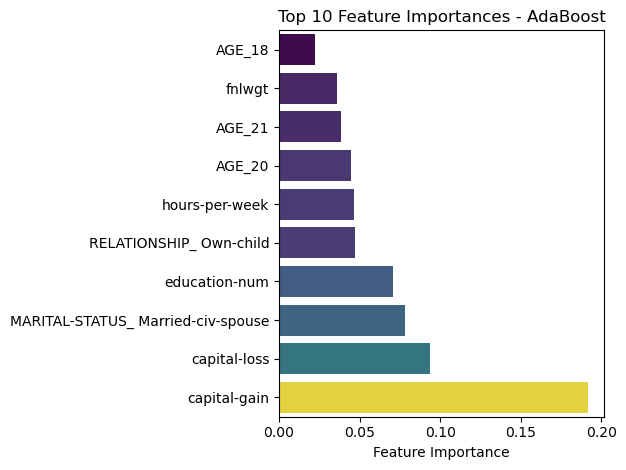

In [25]:
# ===== AdaBoost Feature Importances ======
k = 10
best_ab = ab_pipeline.grid.best_estimator_

ab_importances = pd.Series(best_ab.feature_importances_, index=X_tr.columns)
top_features = ab_importances.sort_values(ascending=False).head(k)

sns.barplot(
    x=top_features.sort_values().values,
    y=top_features.sort_values().index,
    hue=top_features.sort_values().values,
    dodge=False,
    palette='viridis',
    legend=False
)

plt.title(f"Top {k} Feature Importances - AdaBoost")
plt.xlabel("Feature Importance")
plt.ylabel('')
plt.tight_layout()
plt.savefig('media/04_adaboost/significant_features_viz.png')
plt.show()